In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('Obesity.csv')
#data.head()
data['BMI'] = data['Weight'] / (data['Height'] ** 2)
data.head()


Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad        BMI  
0  Public_Transportation        Normal_Weight  24.386526  
1  Public_Transportation        Normal_Weight  24.238227  
2  Public_Transportation        Normal_Weight  23.765432  
3                Walking   Overweight_Level_I  26.851852  
4  Public_Transportation  Overweight_Level_II  28.342381

In [ ]:

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())
data.head()


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          BMI  Actual_BMI_Class  \
count  2111.000000  2111.000000  2111.000000  2111.000000       2111.000000   
mean      2.008011     1.010298     0.657866    29.700159          2.589768   
std       0.612953     0.850592     0.608927     8.011337          1.658632

Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  21.0    1.62    64.0                            yes   no   2.0  3.0   
1  21.0    1.52    56.0                            yes   no   3.0  3.0   
2  23.0    1.80    77.0                            yes   no   2.0  3.0   
3  27.0    1.80    87.0                             no   no   3.0  3.0   
4  22.0    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  ...  TUE        CALC           NObeyesdad  \
0  Sometimes    no   2.0  ...  1.0          no        Normal_Weight   
1  Sometimes   yes   3.0  ...  0.0   Sometimes        Normal_Weight   
2  Sometimes    no   2.0  ...  1.0  Frequently        Normal_Weight   
3  Sometimes    no   2.0  ...  0.0  Frequently   Overweight_Level_I   
4  Sometimes    no   2.0  ...  0.0   Sometimes  Overweight_Level_II   

         BMI Actual_BMI_Class  Gender_Male  MTRANS_Bike  MTRANS_Motorbike  \
0  24.386526                0            0            0                 0   
1  24.238227                0            0            0                 0   
2  23.765432                0            1            0                 0   
3  26.851852                4            1            0                 0   
4  28.342381                4            1            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0  

[5 rows x 22 columns]

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


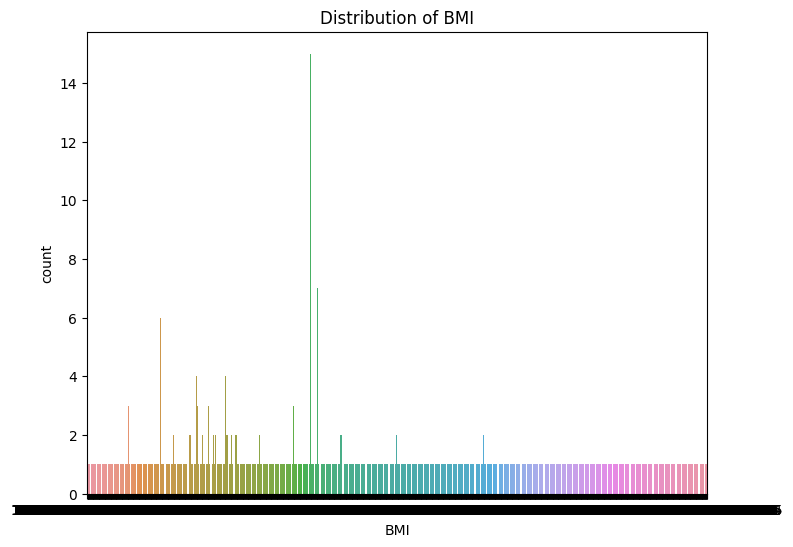

In [ ]:
# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI', data=data)
plt.title('Distribution of BMI')
plt.show()

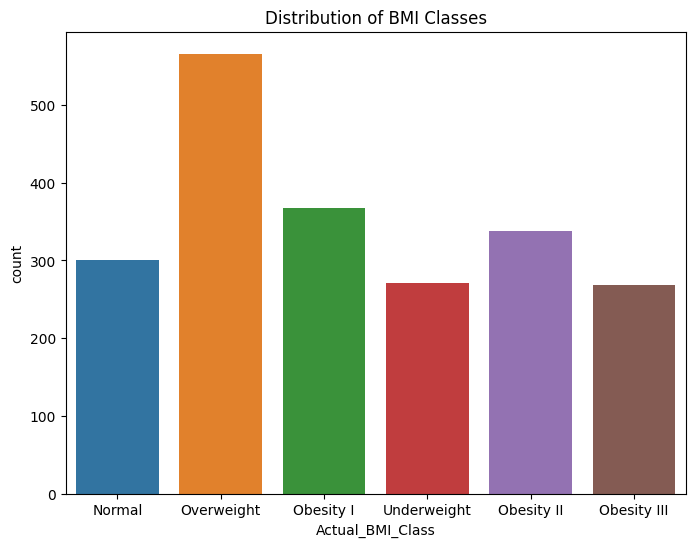

<ipython-input-18-ed1faeac13e7>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


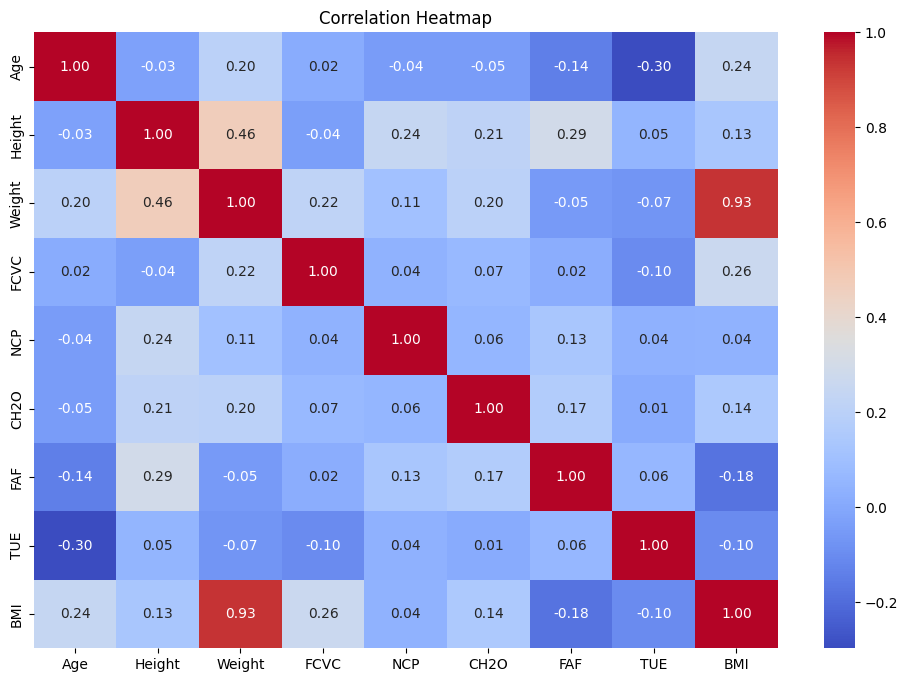

In [ ]:
# Assign BMI classifications based on WHO and Mexican Normativity standards
def assign_bmi_class(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 25.0:
        return 'Normal'
    elif 25.0 <= bmi_value < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi_value < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi_value < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

data['Actual_BMI_Class'] = data['BMI'].apply(assign_bmi_class)

# Explore the distribution of the target variable (BMI classification)
plt.figure(figsize=(8, 6))
sns.countplot(x='Actual_BMI_Class', data=data)
plt.title('Distribution of BMI Classes')
plt.show()

# Explore relationships between numerical variables and the target
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Accuracy: 0.5602836879432624


<ipython-input-19-3da33b8a88c6>:73: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


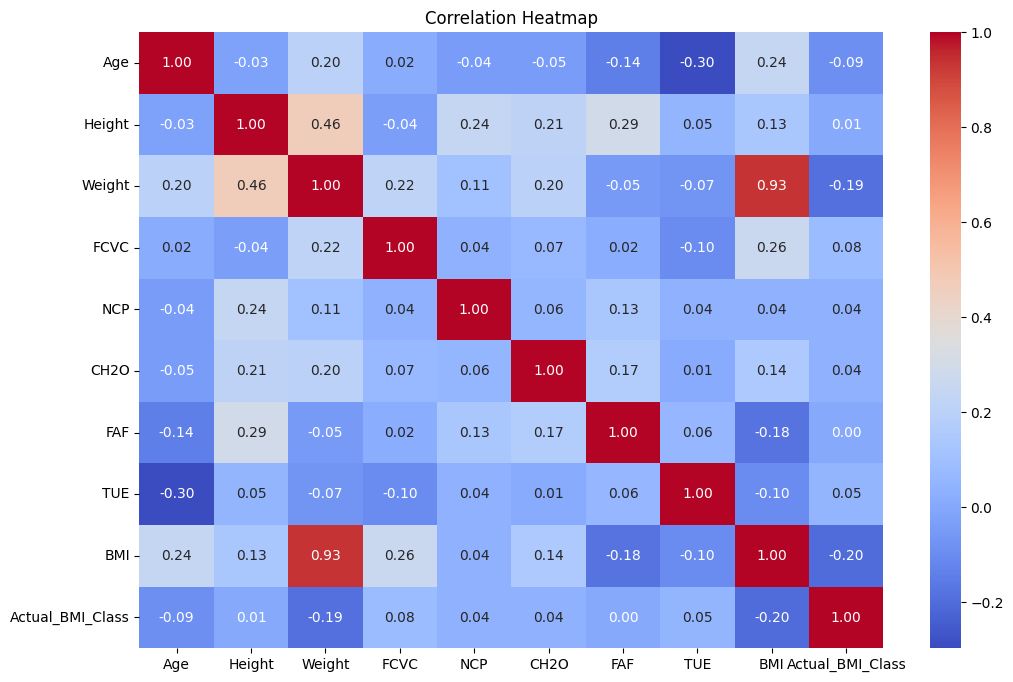

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

data = pd.read_csv('Obesity.csv')

# Assuming 'Weight' is in kilograms and 'Height' is in meters
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Assign BMI classifications based on WHO and Mexican Normativity standards
def assign_bmi_class(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 25.0:
        return 'Normal'
    elif 25.0 <= bmi_value < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi_value < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi_value < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

data['Actual_BMI_Class'] = data['BMI'].apply(assign_bmi_class)

# Label encode the target variable Actual BMI
le = LabelEncoder()
data['Actual_BMI_Class'] = le.fit_transform(data['Actual_BMI_Class'])

# Split the data into features (X) and target variable (y)
X = data.drop(['Actual_BMI_Class', 'Weight', 'Height', 'BMI', 'NObeyesdad', ], axis=1)
y = data['Actual_BMI_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build a pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
#print('Classification Report:\n', classification_report_result)
# Explore relationships between numerical variables and the target
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_result)

Accuracy: 0.5602836879432624
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.24      0.31        67
           1       0.60      0.39      0.47        83
           2       0.51      0.70      0.59        60
           3       0.91      0.91      0.91        58
           4       0.44      0.52      0.48       101
           5       0.55      0.76      0.64        54

    accuracy                           0.56       423
   macro avg       0.58      0.59      0.57       423
weighted avg       0.56      0.56      0.55       423



## Comparing models. Multinomical Logistic regression, Random Forest and Gradient Boosting

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = pd.read_csv('Obesity.csv')

# Assuming 'Weight' is in kilograms and 'Height' is in meters
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Assign BMI classifications based on WHO and Mexican Normativity standards
def assign_bmi_class(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value < 25.0:
        return 'Normal'
    elif 25.0 <= bmi_value < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi_value < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi_value < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

data['Actual_BMI_Class'] = data['BMI'].apply(assign_bmi_class)

# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['Gender', 'MTRANS'], drop_first=True)

# Label encode the target variable 'Actual_BMI_Class'
le = LabelEncoder()
data['Actual_BMI_Class'] = le.fit_transform(data['Actual_BMI_Class'])

# Split the data into features (X) and target variable (y)
X = data.drop(['Actual_BMI_Class', 'Weight', 'Height', 'BMI', 'NObeyesdad'], axis=1)
y = data['Actual_BMI_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build a pipeline with preprocessing and model
logistic_regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))])

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_result_lr = classification_report(y_test, y_pred_lr)

print('Logistic Regression Model:')
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:\n', classification_report_result_lr)

# Build a Random Forest classifier
random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_result_rf = classification_report(y_test, y_pred_rf)

print('\nRandom Forest Model:')
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:\n', classification_report_result_rf)

# Build a Gradient Boosting classifier
gradient_boosting_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(random_state=42))])

# Train the Gradient Boosting model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_result_gb = classification_report(y_test, y_pred_gb)

print('\nGradient Boosting Model:')
print(f'Accuracy: {accuracy_gb}')
print('Classification Report:\n', classification_report_result_gb)

Logistic Regression Model:
Accuracy: 0.5177304964539007
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.24      0.31        67
           1       0.59      0.39      0.47        83
           2       0.41      0.40      0.41        60
           3       0.75      0.91      0.82        58
           4       0.42      0.56      0.48       101
           5       0.54      0.69      0.60        54

    accuracy                           0.52       423
   macro avg       0.53      0.53      0.52       423
weighted avg       0.52      0.52      0.50       423


Random Forest Model:
Accuracy: 0.7848699763593381
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        67
           1       0.79      0.71      0.75        83
           2       0.76      0.85      0.80        60
           3       0.96      0.88      0.92        58
           4       0.73      0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


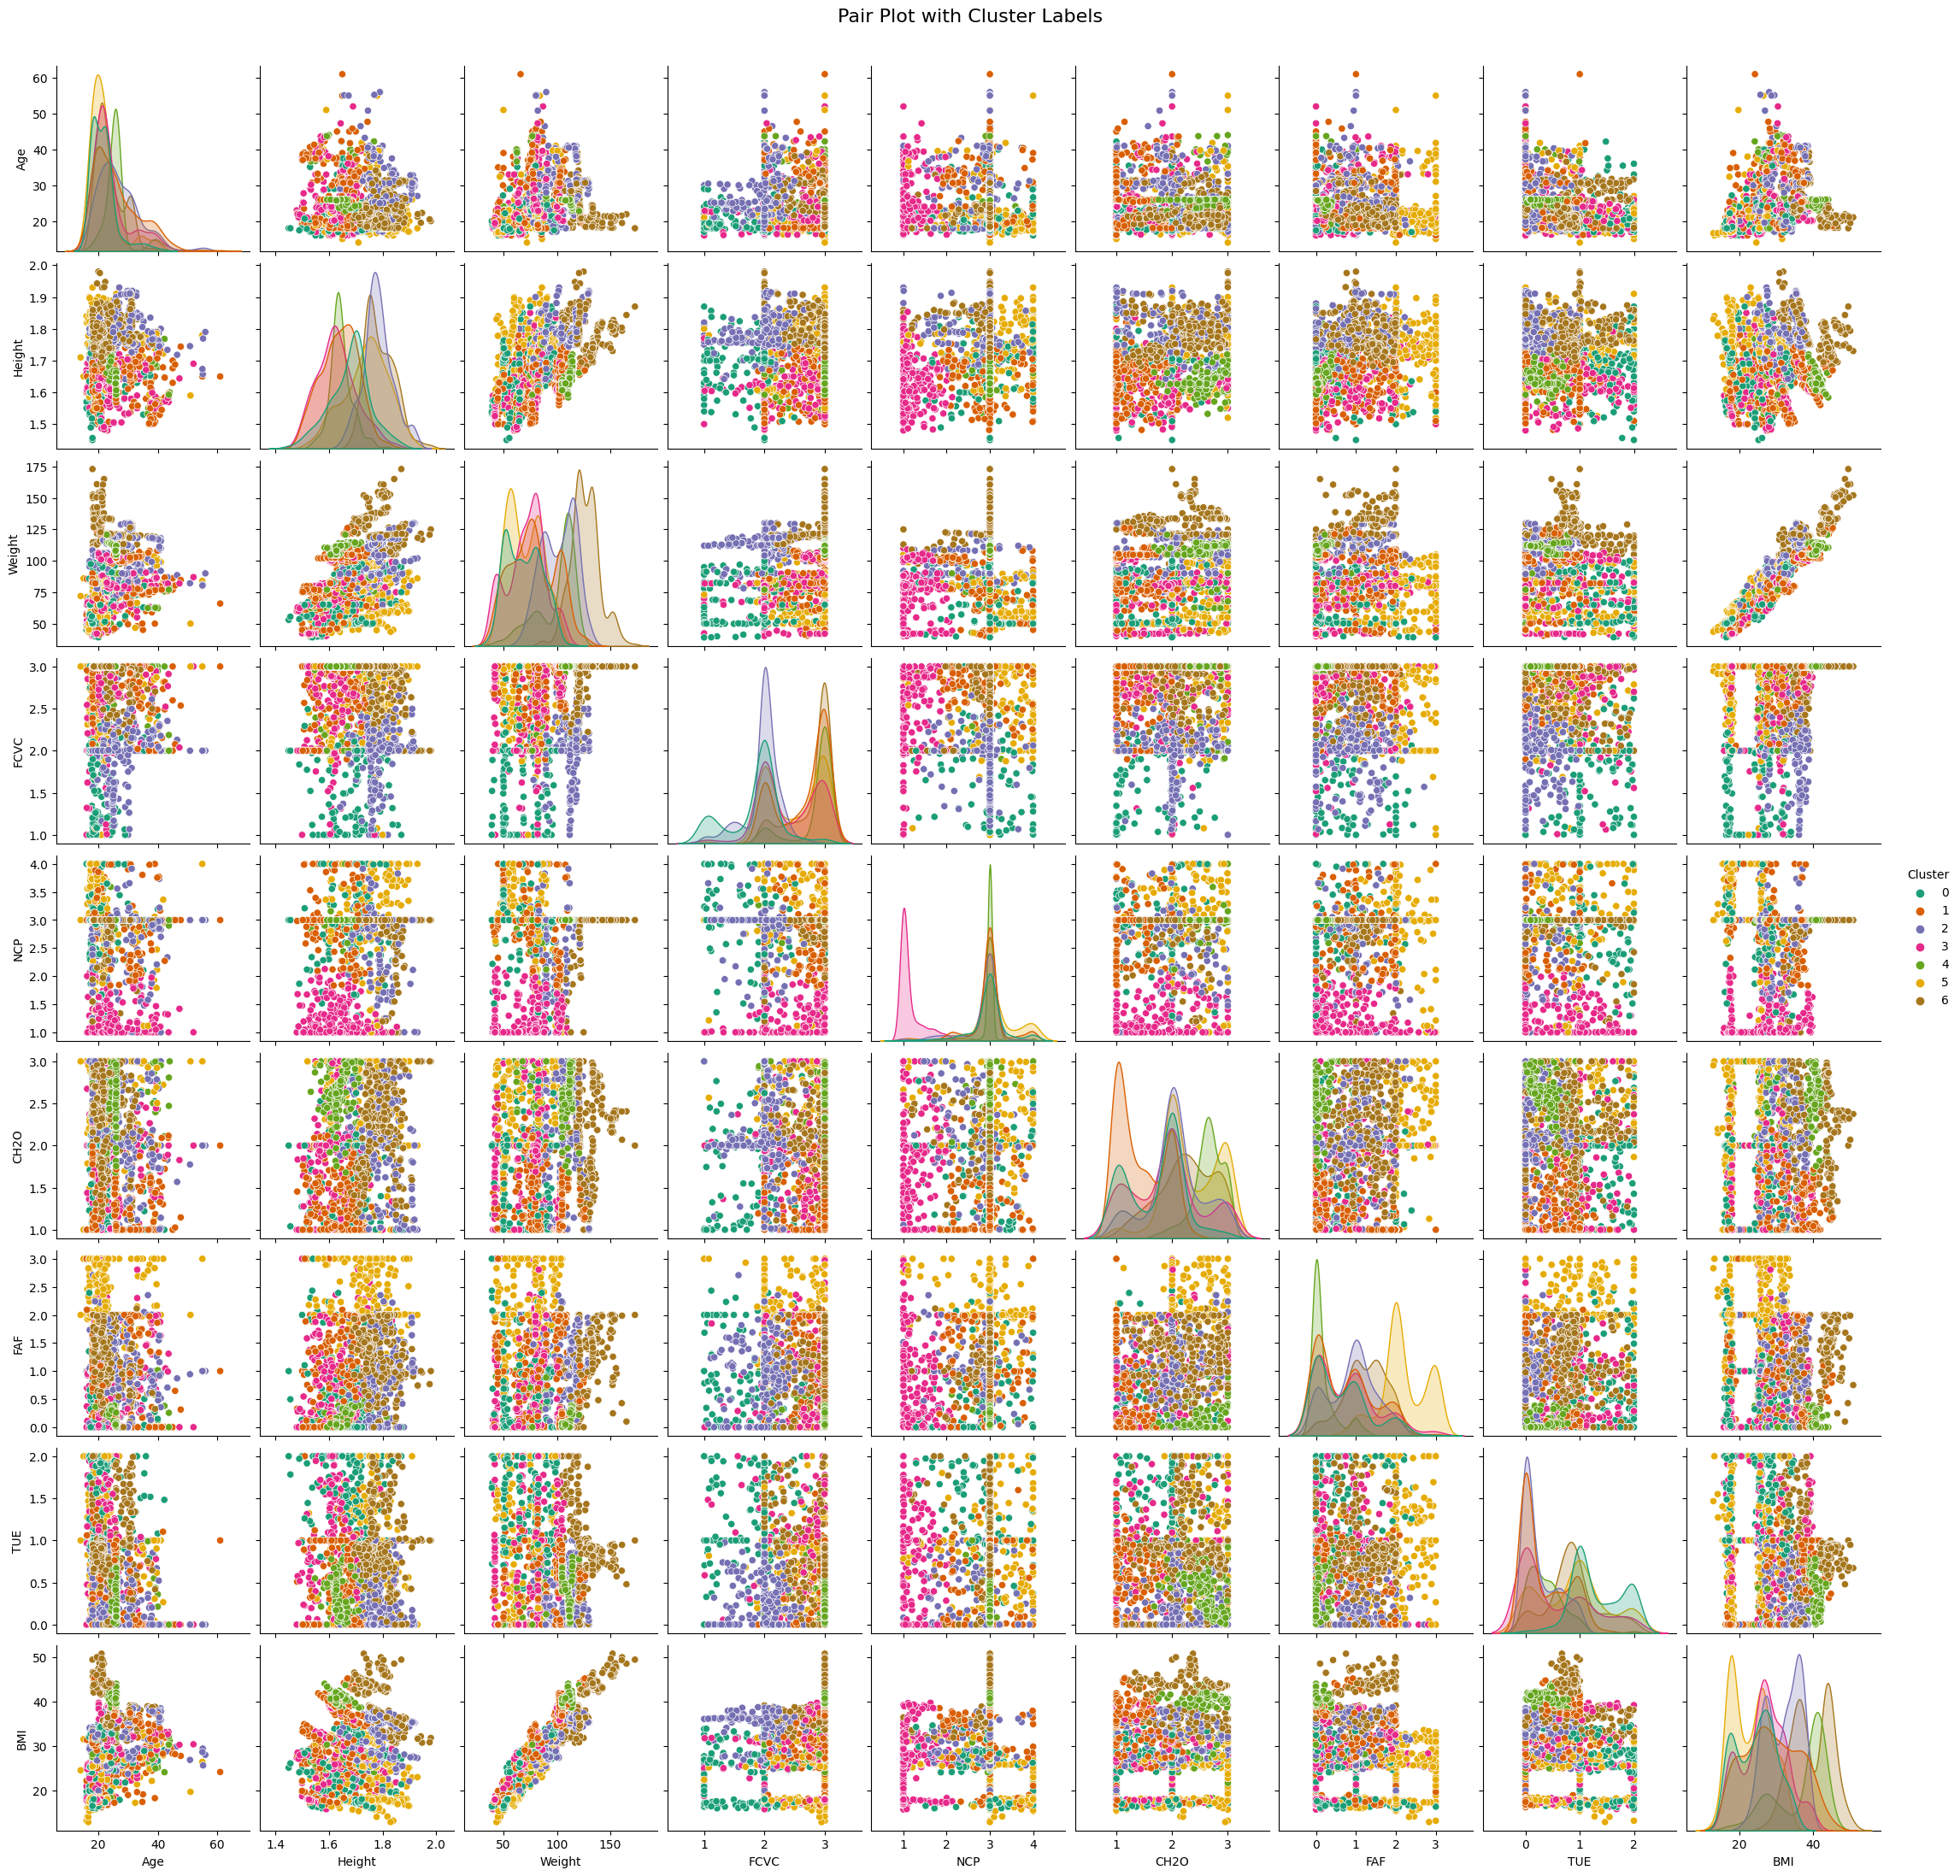

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('Obesity.csv')

# Assuming 'Weight' is in kilograms and 'Height' is in meters
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Select relevant features for clustering
features_for_clustering = ['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Extract the features
X_clustering = data[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Choose the number of clusters (you may need to experiment with this)
n_clusters = 3

# Apply K-Means clustering with Euclidean distance
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Visualize the clusters in a pair plot
pair_plot = sns.pairplot(data, hue='Cluster', palette='Dark2')

# Label the clusters in the legend
pair_plot.fig.subplots_adjust(top=0.95)  # Adjust the subplot layout to make room for the title
pair_plot.fig.suptitle('Pair Plot with Cluster Labels', fontsize=16)

# Show the plot
plt.show()